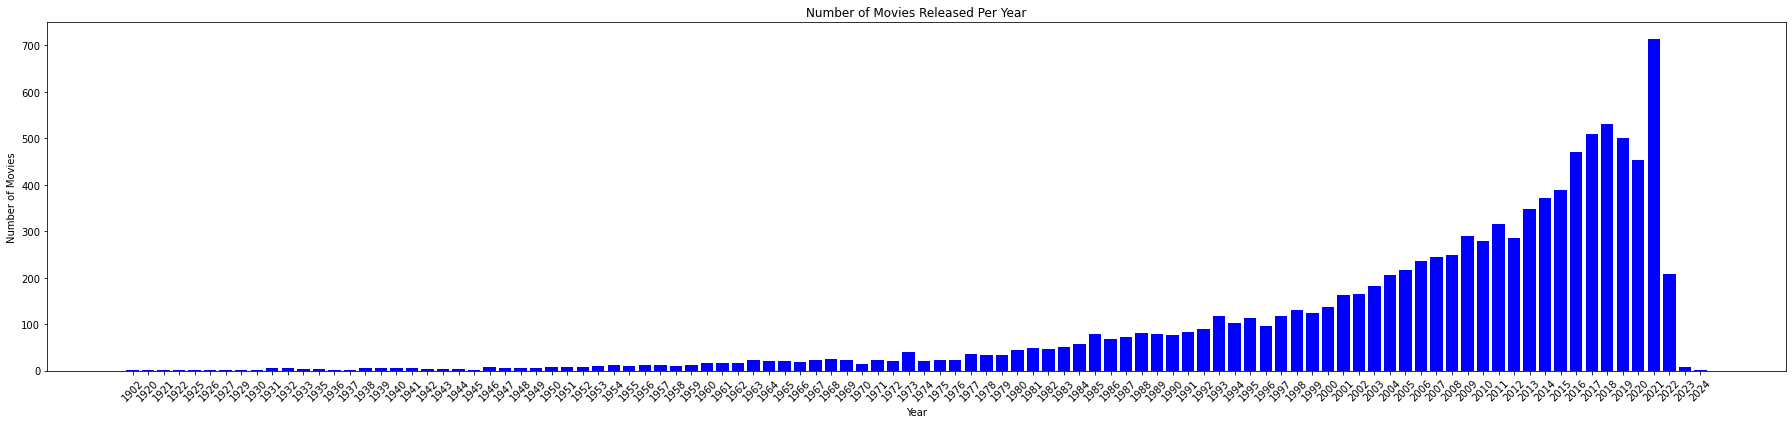

In [1]:
from pyspark import SparkConf, SparkContext
import csv
import matplotlib.pyplot as plt

def get_year(date):
    values = date.split("-")
    return values[0]

if __name__ == "__main__":
    conf = SparkConf().setMaster("local").setAppName("IMDB")
    sc = SparkContext(conf=conf)
    
    # Predlog 1
    # Sredi datume
    # Broj filmova po godinama
    
    mymoviedb = sc.textFile("mymoviedb.csv")
    header = mymoviedb.first()
    
    dataWithoutHeader = mymoviedb.filter(lambda line: line != header)
    
    # Extract year from date and add 1 in tuple to make sum of movies released in that year
    # Like that we can see how movies industry made progress
    # mapPartitions reads and processes each partition of the data using the CSV reader, and extracts the year from the date
    # reduceByKey groups the data by year and sums up the counts
    # sortByKey sorts the data by year
    data = dataWithoutHeader.mapPartitions(lambda x: csv.reader(x)).map(lambda x: (get_year(x[0]), 1)) \
         .reduceByKey(lambda a, b: a + b) \
         .sortByKey()
        
    output_path = "number_of_movies_per_year_output"
    data.saveAsTextFile(output_path)

    # Collect the data to the driver
    collected_data = data.collect()
    
    # Extract years and counts
    years = [entry[0] for entry in collected_data]
    counts = [entry[1] for entry in collected_data]
    
    # Plotting the data
    # figsize parameter specifies the dimensions (width and height) of the figure in inches
    plt.figure(figsize=(25, 6))
    plt.bar(years, counts, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title('Number of Movies Released Per Year')
    
    # used to customize the tick marks on the x-axis (years in this case).
    plt.xticks(rotation=45)
    # ensures that all elements of the plot are properly visible and spaced
    plt.tight_layout()
    
    # Save or show the plot
    plt.savefig("movies_per_year.jpg")
    plt.show()
    
    # Stop the Spark context
    sc.stop()
